<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load and Prepare Data

In [2]:
titanic = pd.read_csv("train.csv")
vs = titanic.copy()
test = pd.read_csv("test.csv")
Y_test = pd.read_csv("sampleSubmission.csv")["Survived"]

## EDA

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.drop(columns=['Name', 'Ticket','PassengerId'], inplace=True)

In [8]:
titanic.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
684,0,2,male,60.0,1,1,39.0000,NaN,S
836,0,3,male,21.0,0,0,8.6625,NaN,S
15,1,2,female,55.0,0,0,16.0000,NaN,S
474,0,3,female,22.0,0,0,9.8375,NaN,S
680,0,3,female,NaN,0,0,8.1375,NaN,Q
471,0,3,male,38.0,0,0,8.6625,NaN,S
809,1,1,female,33.0,1,0,53.1000,E8,S
116,0,3,male,70.5,0,0,7.7500,NaN,Q
151,1,1,female,22.0,1,0,66.6000,C2,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [10]:
for col in titanic.columns:
    print(titanic.value_counts(col))
    print("------------------")

Survived
0    549
1    342
dtype: int64
------------------
Pclass
3    491
1    216
2    184
dtype: int64
------------------
Sex
male      577
female    314
dtype: int64
------------------
Age
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Length: 88, dtype: int64
------------------
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64
------------------
Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
dtype: int64
------------------
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.1125      1
8.1375      1
17.4000     1
8.1583      1
7.7292      1
Length: 248, dtype: int64
------------------
Cabin
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Length: 147, dtype: int64
------

In [11]:
for col in titanic.columns:
    print(titanic.value_counts(col, normalize=True)*100)
    print("------------------")

Survived
0    61.616162
1    38.383838
dtype: float64
------------------
Pclass
3    55.106622
1    24.242424
2    20.650954
dtype: float64
------------------
Sex
male      64.758698
female    35.241302
dtype: float64
------------------
Age
24.00    4.201681
22.00    3.781513
18.00    3.641457
30.00    3.501401
28.00    3.501401
           ...   
20.50    0.140056
14.50    0.140056
12.00    0.140056
0.92     0.140056
80.00    0.140056
Length: 88, dtype: float64
------------------
SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
dtype: float64
------------------
Parch
0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
dtype: float64
------------------
Fare
8.0500     4.826038
13.0000    4.713805
7.8958     4.264871
7.7500     3.815937
26.0000    3.479237
             ...   
8.1125     0.112233
8.1375     0.112233
17.4000    0.112233
8.1583     0.112233
7.7292     0.112233


In [12]:
death = titanic[titanic["Survived"]==0]
living = titanic[titanic["Survived"]==1]

In [13]:
death

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
888,0,3,female,NaN,1,2,23.4500,NaN,S


In [14]:
living

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,NaN,C
879,1,1,female,56.0,0,1,83.1583,C50,C
880,1,2,female,25.0,0,1,26.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S


In [15]:
titanic["Fare"].mean()


32.2042079685746

In [16]:
death["Fare"].mean()

22.117886885245877

In [17]:
living["Fare"].mean()

48.39540760233917

In [18]:
titanic["Age"].mean()

29.69911764705882

In [19]:
death["Age"].mean()

30.62617924528302

In [20]:
living["Age"].mean()

28.343689655172415

In [21]:
men = titanic[titanic["Sex"]=='male']
woman = titanic[titanic["Sex"]=='female']

In [22]:
men["Fare"].mean()

25.523893414211418

In [23]:
woman["Fare"].mean()

44.47981783439487

In [24]:
men["Age"].mean()

30.72664459161148

In [25]:
woman["Age"].mean()

27.915708812260537

In [26]:
upper_pclass = titanic[titanic["Pclass"]==1]
middle_pclass = titanic[titanic["Pclass"]==2]
lower_pclass = titanic[titanic["Pclass"]==3]

In [27]:
upper_pclass["Fare"].mean()

84.15468749999992

In [28]:
middle_pclass["Fare"].mean()

20.66218315217391

In [29]:
lower_pclass["Fare"].mean()

13.675550101832997

In [30]:
upper_pclass["Age"].mean()

38.233440860215055

In [31]:
middle_pclass["Age"].mean()

29.87763005780347

In [32]:
lower_pclass["Age"].mean()

25.14061971830986

In [33]:
titanic["Fare"].mean()

32.2042079685746

In [34]:
fare = titanic[titanic["Fare"]>32]

In [35]:
fare["Survived"].value_counts()

1    126
0     85
Name: Survived, dtype: int64

In [36]:
titanic["Age"].mean()

29.69911764705882

In [37]:
old_age = titanic[titanic["Age"]>40]

In [38]:
mid_age = titanic[(40>titanic["Age"]) & (titanic["Age"]>20)]

In [39]:
low_age = titanic[20>titanic["Age"]]

In [40]:
old_age["Fare"].mean()

42.204946666666665

In [41]:
mid_age["Fare"].mean()

33.91132177419353

In [42]:
low_age["Fare"].mean()

31.79474146341464

In [43]:
pd.crosstab(titanic["Sex"], titanic["Survived"], normalize='index', margins=True)*100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815
All,61.616162,38.383838


In [44]:
pd.crosstab(titanic["Sex"], titanic["Survived"], normalize='columns', margins=True)*100

Survived,0,1,All
Sex,,,
female,14.754098,68.128655,35.241302
male,85.245902,31.871345,64.758698


In [45]:
pd.crosstab(men["Pclass"], men["Survived"], margins=True)

Survived,0,1,All
Pclass,,,
1,77,45,122
2,91,17,108
3,300,47,347
All,468,109,577


In [46]:
pd.crosstab(men["Embarked"], men["Survived"], margins=True)

Survived,0,1,All
Embarked,,,
C,66,29,95
Q,38,3,41
S,364,77,441
All,468,109,577


In [47]:
pd.crosstab(woman["Pclass"], woman["Survived"], margins=True)

Survived,0,1,All
Pclass,,,
1,3,91,94
2,6,70,76
3,72,72,144
All,81,233,314


In [48]:
pd.crosstab(woman["Embarked"], woman["Survived"], margins=True)

Survived,0,1,All
Embarked,,,
C,9,64,73
Q,9,27,36
S,63,140,203
All,81,231,312


In [49]:
pd.crosstab(upper_pclass["Sex"], upper_pclass["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,3,91,94
male,77,45,122
All,80,136,216


In [50]:
pd.crosstab(middle_pclass["Sex"], middle_pclass["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,6,70,76
male,91,17,108
All,97,87,184


In [51]:
pd.crosstab(lower_pclass["Sex"], lower_pclass["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,72,72,144
male,300,47,347
All,372,119,491


In [52]:
pd.crosstab(old_age["Sex"], old_age["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,11,37,48
male,84,18,102
All,95,55,150


In [53]:
pd.crosstab(mid_age["Sex"], mid_age["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,28,102,130
male,197,45,242
All,225,147,372


In [54]:
pd.crosstab(low_age["Sex"], low_age["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,22,53,75
male,63,26,89
All,85,79,164


In [55]:
pd.crosstab(fare["Sex"], fare["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,11,93,104
male,74,33,107
All,85,126,211


In [56]:
titanic.groupby(by="Survived")[["Age", "Fare"]].mean().reset_index()

,Survived,Age,Fare
0,0,30.626179,22.117887
1,1,28.343690,48.395408


In [57]:
titanic.groupby(by="Sex")[["Age", "Fare"]].mean().reset_index()

,Sex,Age,Fare
0,female,27.915709,44.479818
1,male,30.726645,25.523893


In [58]:
titanic.groupby(by="Pclass")[["Age", "Fare"]].mean().reset_index()

,Pclass,Age,Fare
0,1,38.233441,84.154687
1,2,29.877630,20.662183
2,3,25.140620,13.675550


In [59]:
titanic.groupby(by="Embarked")[["Age", "Fare"]].mean().reset_index()

,Embarked,Age,Fare
0,C,30.814769,59.954144
1,Q,28.089286,13.276030
2,S,29.445397,27.079812


In [60]:
titanic.groupby(by="Parch")[["Age", "Fare"]].mean().reset_index()

,Parch,Age,Fare
0,0,32.178503,25.586774
1,1,24.422000,46.778180
2,2,17.216912,64.337604
3,3,33.200000,25.951660
4,4,44.500000,84.968750
5,5,39.200000,32.550000
6,6,43.000000,46.900000


In [61]:
titanic.groupby(by="SibSp")[["Age", "Fare"]].mean().reset_index()

,SibSp,Age,Fare
0,0,31.397558,25.692028
1,1,30.089727,44.147370
2,2,22.620000,51.753718
3,3,13.916667,68.908862
4,4,7.055556,31.855556
5,5,10.200000,46.900000
6,8,NaN,69.550000


## Data Preprocessing

In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [63]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [64]:
titanic_dropna_Nan = titanic.dropna()

In [65]:
len(titanic_dropna_Nan)

183

In [66]:
titanic_dropna_Nan.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [67]:
titanic_fillna = titanic.copy()

In [68]:
titanic_fillna.fillna(titanic_fillna.mean(), inplace=True)

C:\Users\LAPTOP~1\AppData\Local\Temp/ipykernel_2432/3951986452.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_fillna.fillna(titanic_fillna.mean(), inplace=True)


In [69]:
titanic_fillna

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,NaN,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,NaN,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,NaN,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,NaN,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [70]:
titanic_fillna.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [71]:
titanic["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [72]:
titanic[titanic["Cabin"]=="B96 B98"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
390,1,1,male,36.0,1,2,120.0,B96 B98,S
435,1,1,female,14.0,1,2,120.0,B96 B98,S
763,1,1,female,36.0,1,2,120.0,B96 B98,S
802,1,1,male,11.0,1,2,120.0,B96 B98,S


In [73]:
titanic[titanic["Cabin"]=="G6"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,1,3,female,4.0,1,1,16.7000,G6,S
205,0,3,female,2.0,0,1,10.4625,G6,S
251,0,3,female,29.0,1,1,10.4625,G6,S
394,1,3,female,24.0,0,2,16.7000,G6,S


In [74]:
titanic[titanic["Cabin"]=="C23 C25 C27"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
27,0,1,male,19.0,3,2,263.0,C23 C25 C27,S
88,1,1,female,23.0,3,2,263.0,C23 C25 C27,S
341,1,1,female,24.0,3,2,263.0,C23 C25 C27,S
438,0,1,male,64.0,1,4,263.0,C23 C25 C27,S


In [75]:
titanic.drop(columns=["Cabin"], inplace=True)

In [76]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [77]:
Age = titanic["Age"].values
Age = Age.reshape(-1,1)

In [78]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer1.fit(Age)
Age = imputer1.transform(Age)

In [79]:
titanic["Age"] = Age

In [80]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [81]:
Embarked = titanic["Embarked"].values
Embarked = Embarked.reshape(-1,1)

In [82]:
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2.fit(Embarked)
Embarked = imputer2.transform(Embarked)

In [83]:
titanic["Embarked"] = Embarked

In [84]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [85]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [86]:
Sex = titanic["Sex"].values

In [87]:
le = LabelEncoder()
Sex = le.fit_transform(Sex)

In [88]:
titanic["Sex"] = Sex

In [89]:
Embarked = titanic["Embarked"].values

In [90]:
le = LabelEncoder()
Embarked = le.fit_transform(Embarked)

In [91]:
titanic["Embarked"] = Embarked

In [92]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


## Strorytelling - Visualization

In [93]:
vs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
vs.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], inplace=True)

In [95]:
Age = vs["Age"].values
Age = Age.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Age = imputer.fit_transform(Age)
vs["Age"] = Age

In [96]:
Embarked = vs["Embarked"].values
Embarked = Embarked.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
Embarked = imputer.fit_transform(Embarked)
vs["Embarked"] = Embarked

In [97]:
vs.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [98]:
vs['Pclass']=vs['Pclass'].map({1:"upper",2:"middle", 3:"lower"})

In [99]:
vs['Survived'] = vs['Survived'].map({0:"death", 1:"alive"})

In [100]:
vs

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,death,lower,male,22.000000,1,0,7.2500,S
1,alive,upper,female,38.000000,1,0,71.2833,C
2,alive,lower,female,26.000000,0,0,7.9250,S
3,alive,upper,female,35.000000,1,0,53.1000,S
4,death,lower,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,death,middle,male,27.000000,0,0,13.0000,S
887,alive,upper,female,19.000000,0,0,30.0000,S
888,death,lower,female,29.699118,1,2,23.4500,S
889,alive,upper,male,26.000000,0,0,30.0000,C


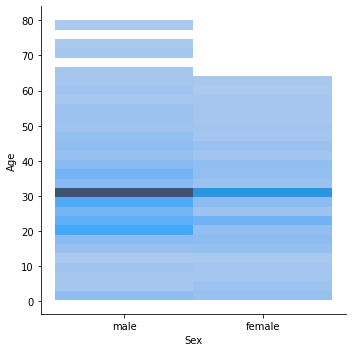

In [101]:
sns.displot(vs, x="Sex", y="Age")

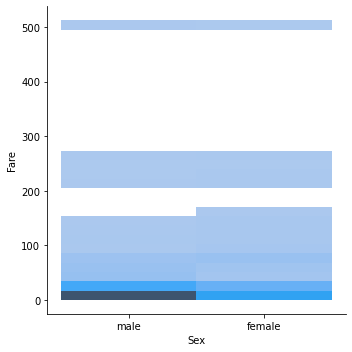

In [102]:
sns.displot(vs, x="Sex", y="Fare", bins=30)

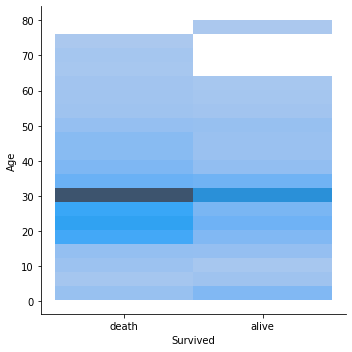

In [103]:
sns.displot(vs, x="Survived", y="Age", bins=20)

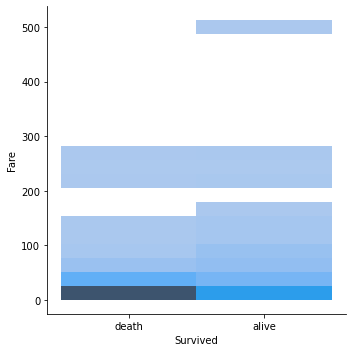

In [104]:
sns.displot(vs, x="Survived", y="Fare", bins=20)

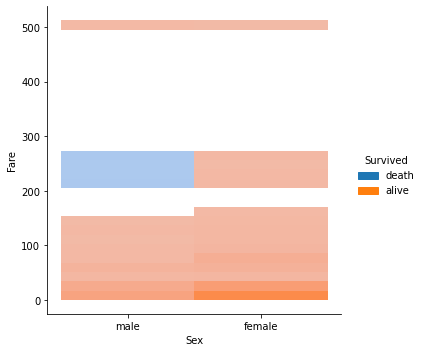

In [105]:
sns.displot(vs, x="Sex", y="Fare", bins=30, hue="Survived")

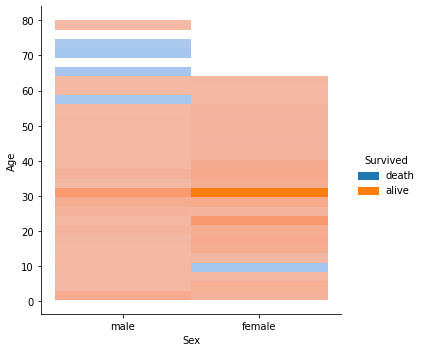

In [106]:
sns.displot(vs, x="Sex", y="Age", bins=30, hue="Survived")

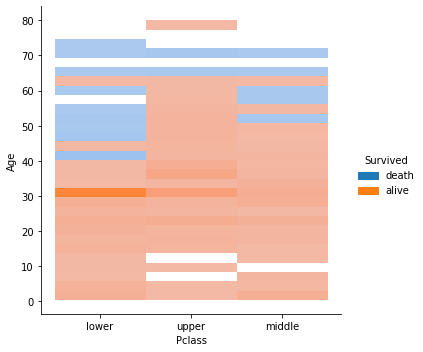

In [107]:
sns.displot(vs, x="Pclass", y="Age", hue="Survived")

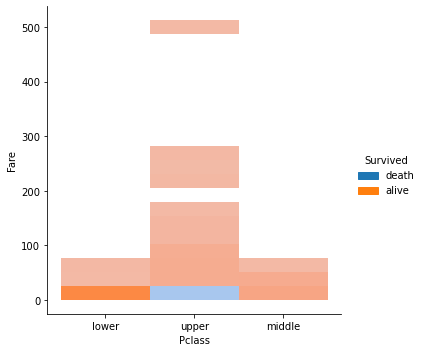

In [108]:
sns.displot(vs, x="Pclass", y="Fare", hue="Survived", bins=20)

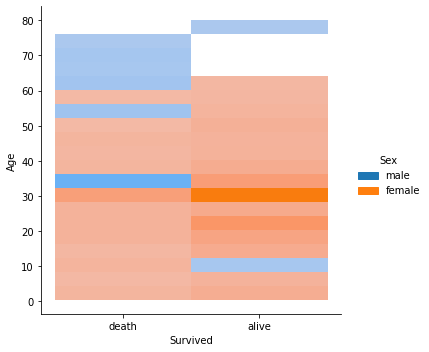

In [109]:
sns.displot(vs, x="Survived", y="Age", hue="Sex", bins=20)

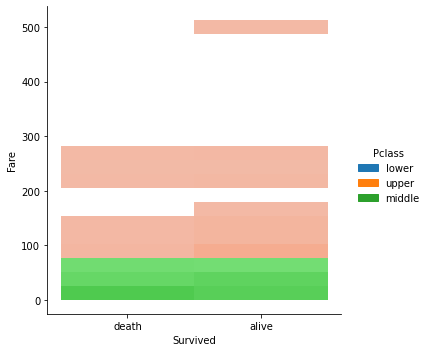

In [110]:
sns.displot(vs, x="Survived", y="Fare", hue="Pclass", bins=20)

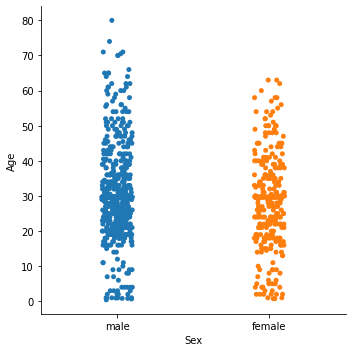

In [111]:
sns.catplot(data=vs, x="Sex", y="Age")

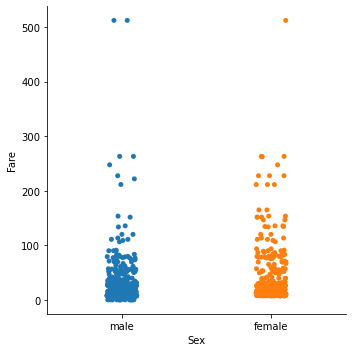

In [112]:
sns.catplot(data=vs, x="Sex", y="Fare")

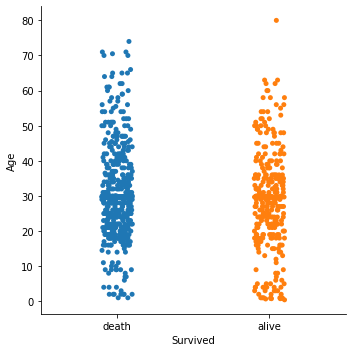

In [113]:
sns.catplot(data=vs, x="Survived", y="Age")

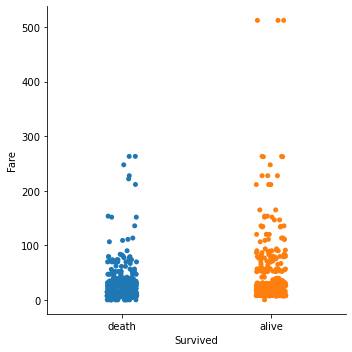

In [114]:
sns.catplot(data=vs, x="Survived", y="Fare")

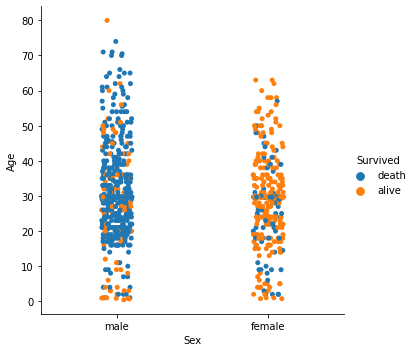

In [115]:
sns.catplot(data=vs, x="Sex", y="Age", hue="Survived")

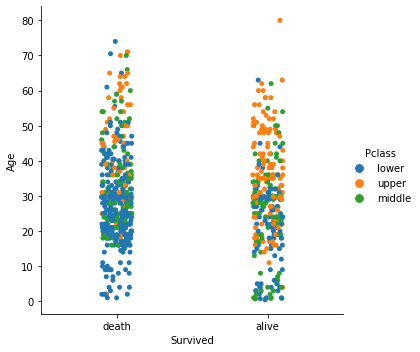

In [116]:
sns.catplot(data=vs, x="Survived", y="Age", hue="Pclass")

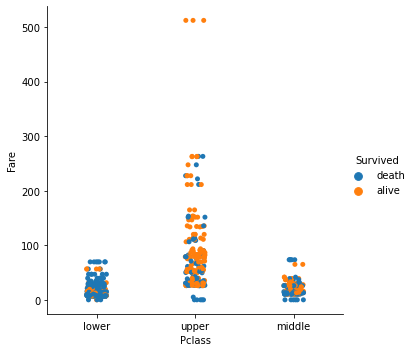

In [117]:
sns.catplot(data=vs, x="Pclass", y="Fare", hue="Survived")

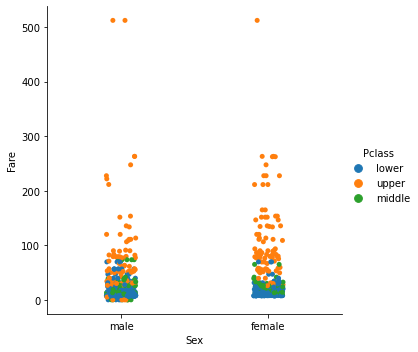

In [118]:
sns.catplot(data=vs, x="Sex", y="Fare", hue="Pclass")

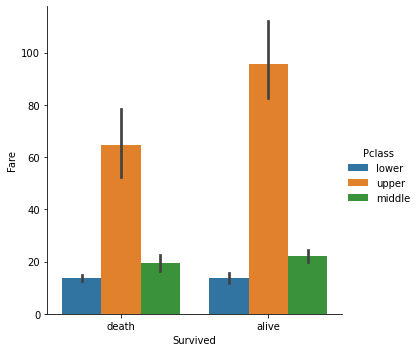

In [119]:
sns.catplot(data=vs, x="Survived", y="Fare",hue="Pclass", kind="bar")

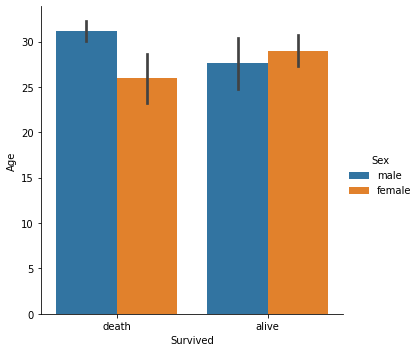

In [120]:
sns.catplot(data=vs, x="Survived", y="Age",hue="Sex", kind="bar")

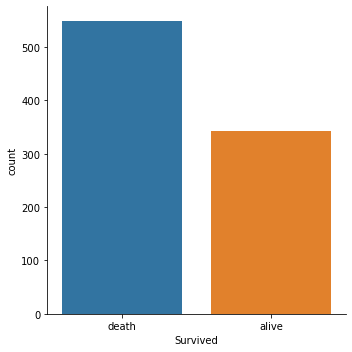

In [121]:
sns.catplot(kind="count", data=vs, x="Survived")

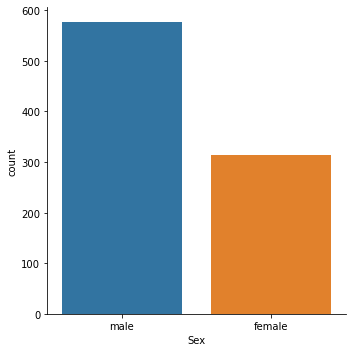

In [122]:
sns.catplot(kind="count", data=vs, x="Sex")

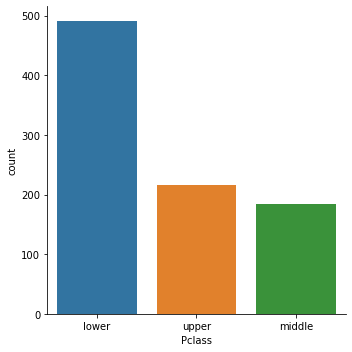

In [123]:
sns.catplot(kind="count", data=vs, x="Pclass")

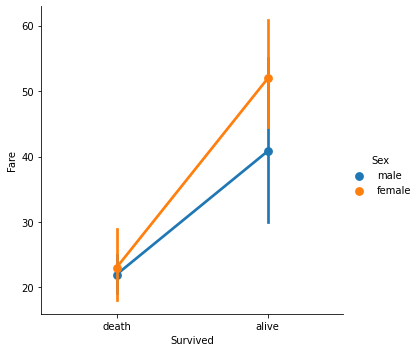

In [124]:
sns.catplot(kind="point", data=vs, x="Survived", y="Fare", hue="Sex")

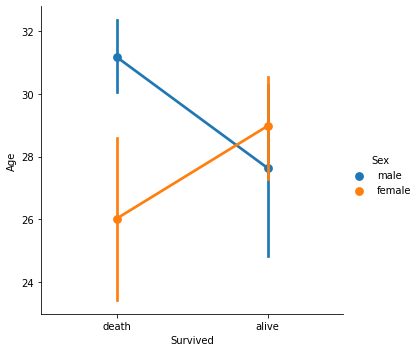

In [125]:
sns.catplot(kind="point", data=vs, x="Survived", y="Age", hue="Sex")

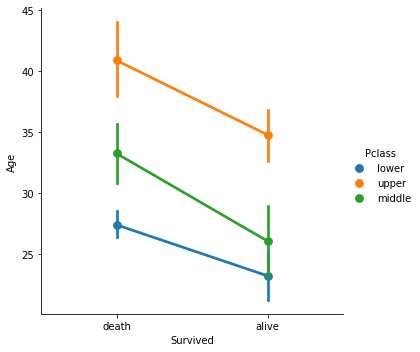

In [126]:
sns.catplot(kind="point", data=vs, x="Survived", y="Age", hue="Pclass")

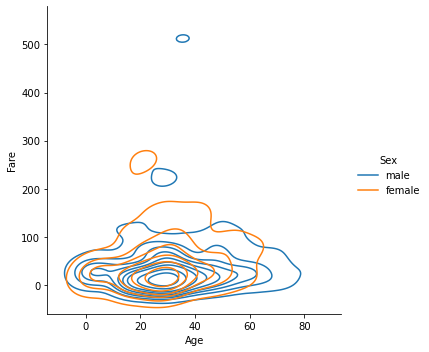

In [127]:
sns.displot(vs, x="Age", kind="kde", y="Fare", hue="Sex")

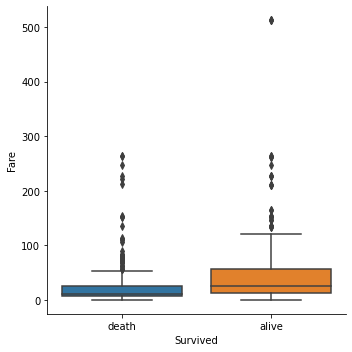

In [128]:
sns.catplot(kind="box", data=vs, x="Survived", y="Fare")

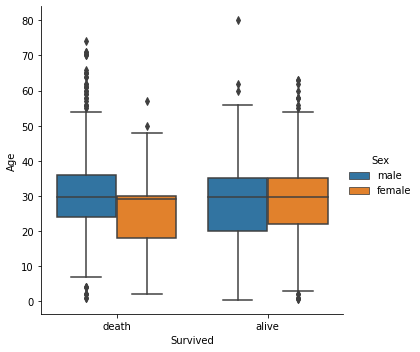

In [129]:
sns.catplot(kind="box", data=vs, x="Survived", y="Age", hue="Sex")

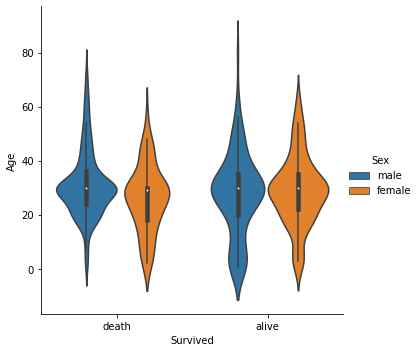

In [130]:
sns.catplot(kind="violin", data=vs, x="Survived", y="Age", hue="Sex")

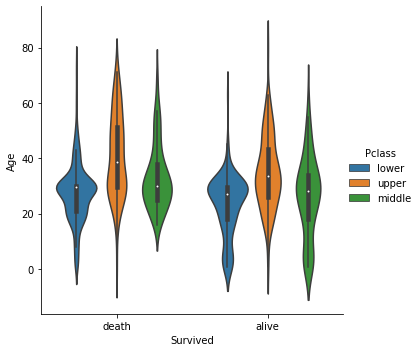

In [131]:
sns.catplot(kind="violin", data=vs, x="Survived", y="Age", hue="Pclass")

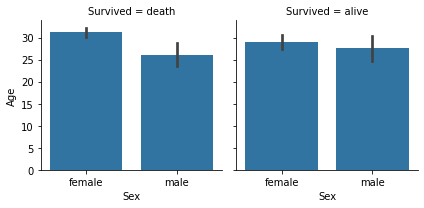

In [132]:
g = sns.FacetGrid(vs, col="Survived")
g.map_dataframe(sns.barplot, x="Sex", y="Age")

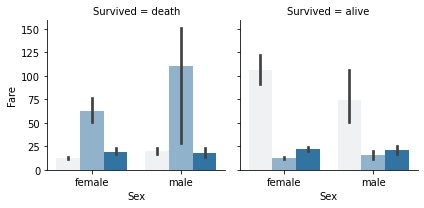

In [133]:
g = sns.FacetGrid(vs, col="Survived")
g.map_dataframe(sns.barplot, x="Sex", y="Fare", hue="Pclass")

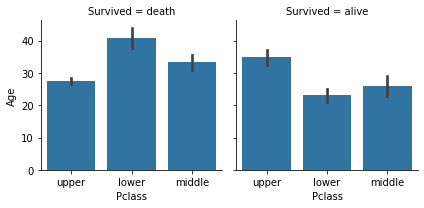

In [134]:
g = sns.FacetGrid(vs, col="Survived")
g.map_dataframe(sns.barplot, x="Pclass", y="Age")

<AxesSubplot:>

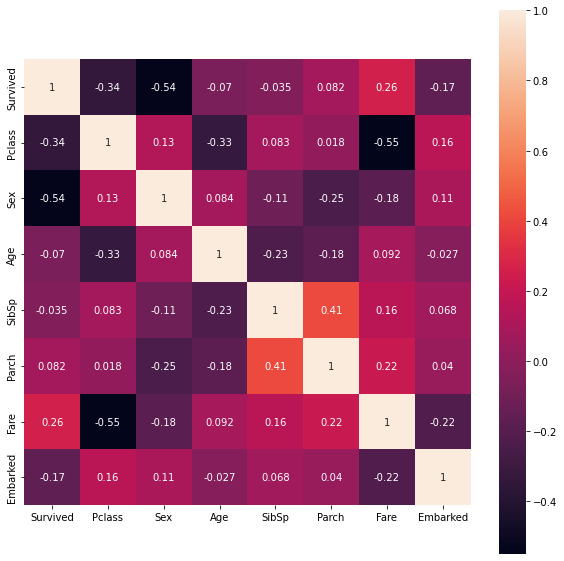

In [135]:
my_correlation = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(my_correlation,annot=True,  annot_kws={'size':10}, cbar=True, square= True)

## Train your model (Classification)

In [136]:
train = titanic.copy()

In [137]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [138]:
test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [139]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [140]:
test.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [141]:
Age = test["Age"].values
Age = Age.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Age = imputer.fit_transform(Age)
test["Age"] = Age

Fare = test["Fare"].values
Fare = Fare.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
Fare = imputer.fit_transform(Fare)
test["Fare"] = Fare

In [142]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [143]:
Embarked = test["Embarked"].values
le = LabelEncoder()
Embarked = le.fit_transform(Embarked)
test["Embarked"] = Embarked

Sex = test["Sex"].values
le = LabelEncoder()
Sex = le.fit_transform(Sex)
test["Sex"] = Sex

In [144]:
sc = StandardScaler()
fs = train[["Age", "Fare"]].values
fs=fs.reshape(-1,2)
fs[:, :] = sc.fit_transform(fs[:, :])

In [145]:
train["Age"] = fs[:, 0:1]
train["Fare"] = fs[: , 1:]

In [146]:
sc = StandardScaler()
fs = test[["Age", "Fare"]].values
fs=fs.reshape(-1,2)
fs[:, :] = sc.fit_transform(fs[:, :])

In [147]:
test["Age"] = fs[:, 0:1]
test["Fare"] = fs[: , 1:]

In [148]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.334993,0,0,-0.498407,1
1,3,0,1.325530,1,0,-0.513274,2
2,2,1,2.514175,0,0,-0.465088,1
3,3,1,-0.259330,0,0,-0.483466,2
4,3,0,-0.655545,1,1,-0.418471,2
...,...,...,...,...,...,...,...
413,3,1,0.000000,0,0,-0.494448,2
414,1,0,0.691586,0,0,1.313753,0
415,3,1,0.651965,0,0,-0.508792,2
416,3,1,0.000000,0,0,-0.494448,2


In [149]:
Y = train["Survived"].values
train.drop(columns="Survived", inplace=True)
X = train.values
X_test = test.values

In [150]:
log_reg = LogisticRegression()
log_reg.fit(X, Y)
y_pred = log_reg.predict(X_test)

In [151]:
metrics.confusion_matrix(Y_test, y_pred)

array([[253,  13],
       [ 11, 141]], dtype=int64)

In [152]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [153]:
print('The Logistic Regression Score is: ', (log_reg.score(X, Y)))
print('The Accuracy of Logistic Regression is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of Logistic Regression is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of Logistic Regression is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of Logistic Regression is: ', (metrics.precision_score(Y_test, y_pred)))

The Logistic Regression Score is:  0.8013468013468014
The Accuracy of Logistic Regression is:  0.9425837320574163
F1-Score of Logistic Regression is:  0.9215686274509804
Recall-Score of Logistic Regression is:  0.9276315789473685
Precision-Score of Logistic Regression is:  0.9155844155844156


In [154]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

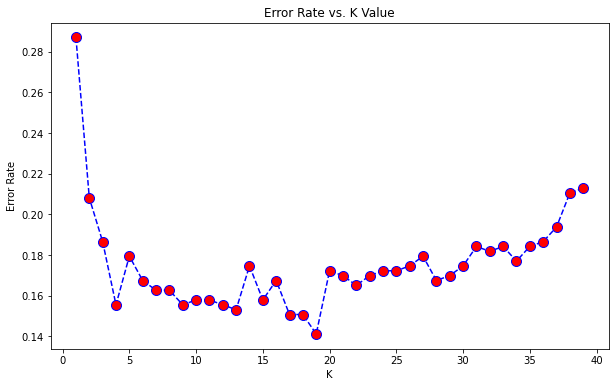

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [156]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, Y)
y_pred = knn.predict(X_test)

In [157]:
metrics.confusion_matrix(Y_test, y_pred)

array([[236,  30],
       [ 29, 123]], dtype=int64)

In [158]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       266
           1       0.80      0.81      0.81       152

    accuracy                           0.86       418
   macro avg       0.85      0.85      0.85       418
weighted avg       0.86      0.86      0.86       418



In [159]:
print('The KNN Score is: ', (knn.score(X, Y)))
print('The Accuracy of KNN is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of KNN is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of KNN is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of KNN is: ', (metrics.precision_score(Y_test, y_pred)))

The KNN Score is:  0.8215488215488216
The Accuracy of KNN is:  0.8588516746411483
F1-Score of KNN is:  0.8065573770491803
Recall-Score of KNN is:  0.8092105263157895
Precision-Score of KNN is:  0.803921568627451


In [160]:
bayes = GaussianNB()
bayes.fit(X, Y)
y_pred = bayes.predict(X_test)

In [161]:
metrics.confusion_matrix(Y_test, y_pred)

array([[231,  35],
       [  8, 144]], dtype=int64)

In [162]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       266
           1       0.80      0.95      0.87       152

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.89       418
weighted avg       0.91      0.90      0.90       418



In [163]:
print('The Native Bayes Score is: ', (bayes.score(X, Y)))
print('The Accuracy of Native Bayes is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of Native Bayes is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of Native Bayes is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of Native Bayes is: ', (metrics.precision_score(Y_test, y_pred)))

The Native Bayes Score is:  0.792368125701459
The Accuracy of Native Bayes is:  0.8971291866028708
F1-Score of Native Bayes is:  0.8700906344410877
Recall-Score of Native Bayes is:  0.9473684210526315
Precision-Score of Native Bayes is:  0.8044692737430168


In [164]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X, Y)
y_pred = svclassifier.predict(X_test)

In [165]:
metrics.confusion_matrix(Y_test, y_pred)

array([[266,   0],
       [  0, 152]], dtype=int64)

In [166]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [167]:
print('The Linear SVC Score is: ', (svclassifier.score(X, Y)))
print('The Accuracy of Linear SVC is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of Linear SVC is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of Linear SVC is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of Linear SVC is: ', (metrics.precision_score(Y_test, y_pred)))

The Linear SVC Score is:  0.7867564534231201
The Accuracy of Linear SVC is:  1.0
F1-Score of Linear SVC is:  1.0
Recall-Score of Linear SVC is:  1.0
Precision-Score of Linear SVC is:  1.0


In [168]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X, Y)
y_pred = svclassifier.predict(X_test)

In [169]:
metrics.confusion_matrix(Y_test, y_pred)

array([[255,  11],
       [  9, 143]], dtype=int64)

In [170]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       266
           1       0.93      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [171]:
print('The rbf SVC Score is: ', (svclassifier.score(X, Y)))
print('The Accuracy of rbf SVC is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of rbf SVC is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of rbf SVC is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of rbf SVC is: ', (metrics.precision_score(Y_test, y_pred)))

The rbf SVC Score is:  0.8316498316498316
The Accuracy of rbf SVC is:  0.9521531100478469
F1-Score of rbf SVC is:  0.934640522875817
Recall-Score of rbf SVC is:  0.9407894736842105
Precision-Score of rbf SVC is:  0.9285714285714286


In [172]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X, Y)
y_pred = svclassifier.predict(X_test)

In [173]:
metrics.confusion_matrix(Y_test, y_pred)

array([[233,  33],
       [ 73,  79]], dtype=int64)

In [174]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       266
           1       0.71      0.52      0.60       152

    accuracy                           0.75       418
   macro avg       0.73      0.70      0.71       418
weighted avg       0.74      0.75      0.74       418



In [175]:
print('The sigmoid SVC Score is: ', (svclassifier.score(X, Y)))
print('The Accuracy of sigmoid SVC is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of sigmoid SVC is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of sigmoid SVC is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of sigmoid SVC is: ', (metrics.precision_score(Y_test, y_pred)))

The sigmoid SVC Score is:  0.6184062850729517
The Accuracy of sigmoid SVC is:  0.7464114832535885
F1-Score of sigmoid SVC is:  0.5984848484848485
Recall-Score of sigmoid SVC is:  0.5197368421052632
Precision-Score of sigmoid SVC is:  0.7053571428571429


In [176]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X, Y)

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [177]:
grid_search = GridSearchCV(estimator = svclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X, Y)

print("Best Accuracy: {:.2f} %".format( grid_search.best_score_*100))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 82.49 %
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [178]:
grid_search = GridSearchCV(estimator = svclassifier,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X, Y)

print("Best f1-score: {:.2f}".format(grid_search.best_score_))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best f1-score: 0.75
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [179]:
grid_search = GridSearchCV(estimator = svclassifier,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X, Y)

print("Best recall-score: {:.2f}".format(grid_search.best_score_))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best recall-score: 0.73
Best Parameters: {'C': 0.25, 'gamma': 0.5, 'kernel': 'rbf'}


In [180]:
grid_search = GridSearchCV(estimator = svclassifier,
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X, Y)

print("Best precision-score: {:.2f}".format(grid_search.best_score_))
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best precision-score: 0.81
Best Parameters: {'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}


In [181]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy')
decision_tree_classifier.fit(X, Y)
y_pred = decision_tree_classifier.predict(X_test)

In [182]:
metrics.confusion_matrix(Y_test, y_pred)

array([[210,  56],
       [ 53,  99]], dtype=int64)

In [183]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       266
           1       0.64      0.65      0.64       152

    accuracy                           0.74       418
   macro avg       0.72      0.72      0.72       418
weighted avg       0.74      0.74      0.74       418



In [184]:
print('The DecisionTreeClassifier Score is: ', (decision_tree_classifier.score(X, Y)))
print('The Accuracy of DecisionTreeClassifier is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of DecisionTreeClassifier is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of DecisionTreeClassifier is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of DecisionTreeClassifier is: ', (metrics.precision_score(Y_test, y_pred)))

The DecisionTreeClassifier Score is:  0.9820426487093153
The Accuracy of DecisionTreeClassifier is:  0.7392344497607656
F1-Score of DecisionTreeClassifier is:  0.6449511400651465
Recall-Score of DecisionTreeClassifier is:  0.6513157894736842
Precision-Score of DecisionTreeClassifier is:  0.6387096774193548


In [185]:
rfc = RandomForestClassifier(criterion="entropy")
rfc.fit(X, Y)
y_pred = rfc.predict(X_test)

In [186]:
metrics.confusion_matrix(Y_test, y_pred)

array([[242,  24],
       [ 46, 106]], dtype=int64)

In [187]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       266
           1       0.82      0.70      0.75       152

    accuracy                           0.83       418
   macro avg       0.83      0.80      0.81       418
weighted avg       0.83      0.83      0.83       418



In [188]:
print('The RandomForestClassifier Score is: ', (rfc.score(X, Y)))
print('The Accuracy of RandomForestClassifier is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of RandomForestClassifier is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of RandomForestClassifier is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of RandomForestClassifier is: ', (metrics.precision_score(Y_test, y_pred)))

The RandomForestClassifier Score is:  0.9820426487093153
The Accuracy of RandomForestClassifier is:  0.8325358851674641
F1-Score of RandomForestClassifier is:  0.7517730496453899
Recall-Score of RandomForestClassifier is:  0.6973684210526315
Precision-Score of RandomForestClassifier is:  0.8153846153846154


In [189]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=train.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

feature_importance

,rfc
Embarked,0.032117
Parch,0.038765
SibSp,0.052363
Pclass,0.085564
Sex,0.215830
Fare,0.286879
Age,0.288482


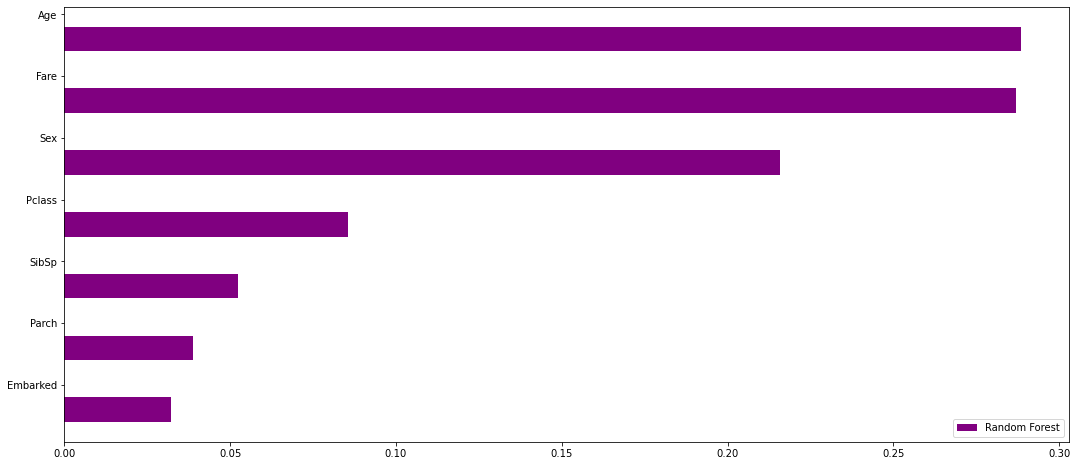

In [190]:
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [191]:
XG = XGBClassifier(n_estimators=100)
XG.fit(X, Y)
y_pred = XG.predict(X_test)

[22:00:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Laptopkaran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [192]:
metrics.confusion_matrix(Y_test, y_pred)

array([[243,  23],
       [ 49, 103]], dtype=int64)

In [193]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       266
           1       0.82      0.68      0.74       152

    accuracy                           0.83       418
   macro avg       0.82      0.80      0.81       418
weighted avg       0.83      0.83      0.82       418



In [194]:
print('The XGBClassifier Score is: ', (XG.score(X, Y)))
print('The Accuracy of XGBClassifier is: ', (metrics.accuracy_score(Y_test, y_pred)))
print('F1-Score of XGBClassifier is: ', (metrics.f1_score(Y_test, y_pred)))
print('Recall-Score of XGBClassifier is: ', (metrics.recall_score(Y_test, y_pred)))
print('Precision-Score of XGBClassifier is: ', (metrics.precision_score(Y_test, y_pred)))

The XGBClassifier Score is:  0.9629629629629629
The Accuracy of XGBClassifier is:  0.8277511961722488
F1-Score of XGBClassifier is:  0.7410071942446044
Recall-Score of XGBClassifier is:  0.6776315789473685
Precision-Score of XGBClassifier is:  0.8174603174603174


## Test Result

In [195]:
score_classifier = {"Accuracy":[0.9425837320574163, 0.8588516746411483, 0.8971291866028708, 1.0, 0.9521531100478469, 0.7464114832535885, 0.8249, 0.7392344497607656, 0.8205741626794258, 0.8277511961722488],
                    "F1-Score":[0.9215686274509804, 0.8065573770491803, 0.8700906344410877, 1.0, 0.934640522875817, 0.5984848484848485, 0.75, 0.6402640264026404, 0.7440273037542662, 0.7410071942446044],
                    "Recall-Score":[0.9276315789473685, 0.8092105263157895, 0.9473684210526315, 1.0, 0.9407894736842105, 0.5197368421052632, 0.73, 0.6381578947368421, 0.7171052631578947, 0.6776315789473685],
                    "Precision-Score":[0.9155844155844156, 0.803921568627451, 0.8044692737430168, 1.0, 0.9285714285714286, 0.7053571428571429, 0.81, 0.6423841059602649, 0.7730496453900709, 0.8174603174603174]}

score_train = pd.DataFrame(score_classifier, index=["LogisticRegression", "KNN", "Native Bayes", "linearSVC", "rbfSVC", "sigmoidSVC", "SVS(GridSearch)", "DecisionTree", "RandomForest", "XGBoost"])

score_train["Type"] = ["LogisticRegression", "KNN", "Native Bayes", "linearSVC", "rbfSVC", "sigmoidSVC", "SVS(GridSearch)", "DecisionTree", "RandomForest", "XGBoost"]

In [196]:
score_train

,Accuracy,F1-Score,Recall-Score,Precision-Score,Type
LogisticRegression,0.942584,0.921569,0.927632,0.915584,LogisticRegression
KNN,0.858852,0.806557,0.809211,0.803922,KNN
Native Bayes,0.897129,0.870091,0.947368,0.804469,Native Bayes
linearSVC,1.000000,1.000000,1.000000,1.000000,linearSVC
rbfSVC,0.952153,0.934641,0.940789,0.928571,rbfSVC
sigmoidSVC,0.746411,0.598485,0.519737,0.705357,sigmoidSVC
SVS(GridSearch),0.824900,0.750000,0.730000,0.810000,SVS(GridSearch)
DecisionTree,0.739234,0.640264,0.638158,0.642384,DecisionTree
RandomForest,0.820574,0.744027,0.717105,0.773050,RandomForest
XGBoost,0.827751,0.741007,0.677632,0.817460,XGBoost


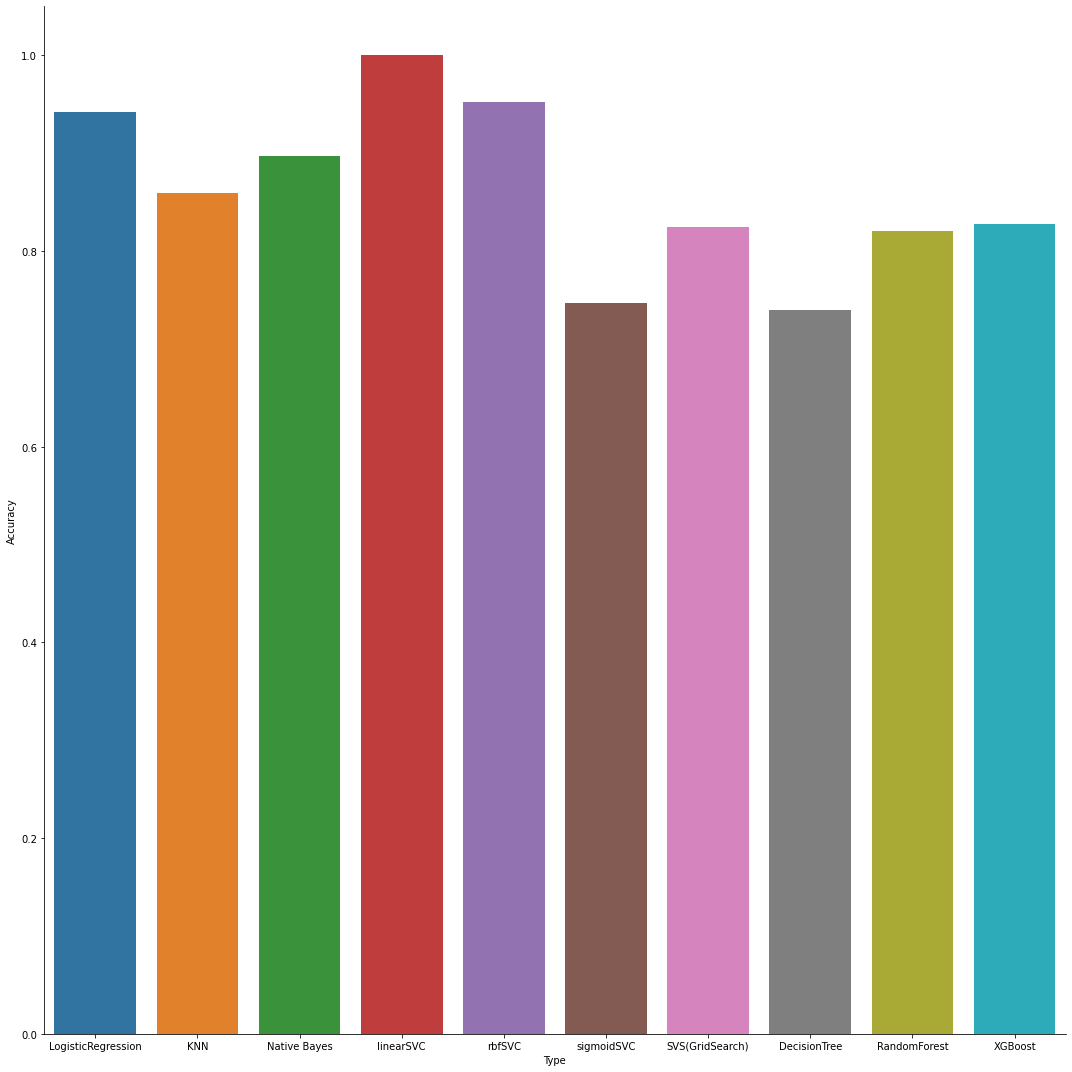

In [197]:
sns.catplot(data=score_train, x="Type", y="Accuracy",kind="bar", height=15)

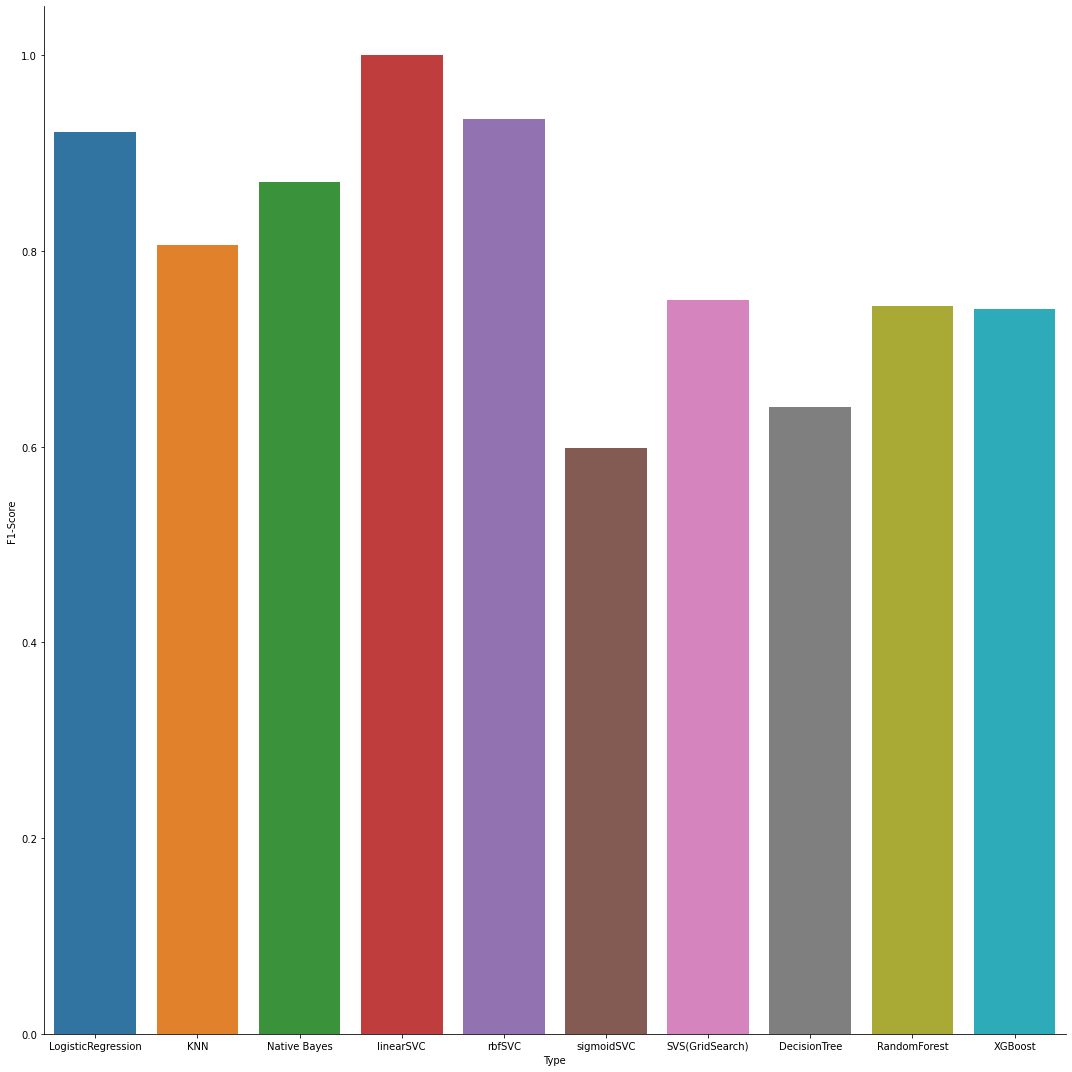

In [198]:
sns.catplot(data=score_train, x="Type", y="F1-Score",kind="bar", height=15)

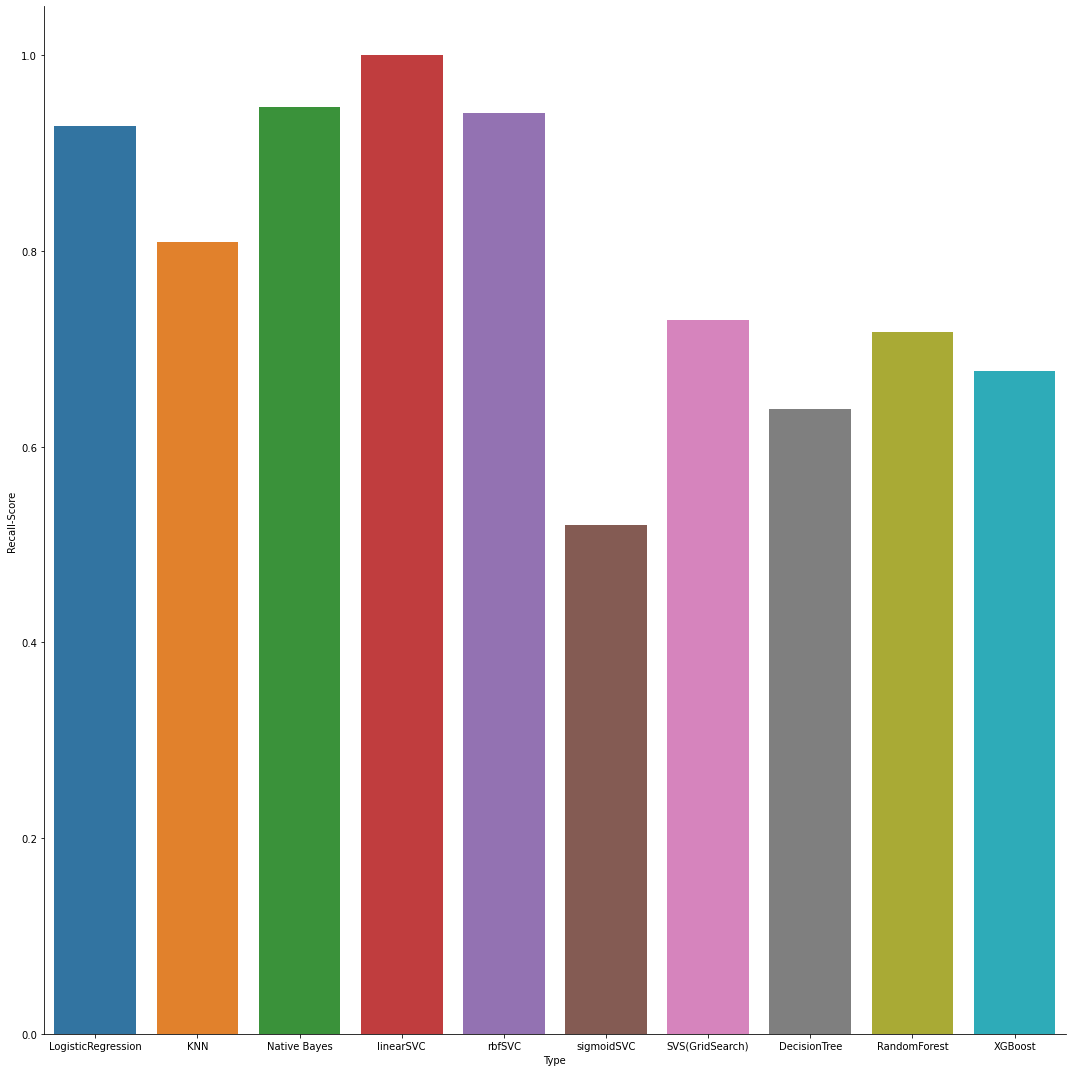

In [199]:
sns.catplot(data=score_train, x="Type", y="Recall-Score",kind="bar", height=15)

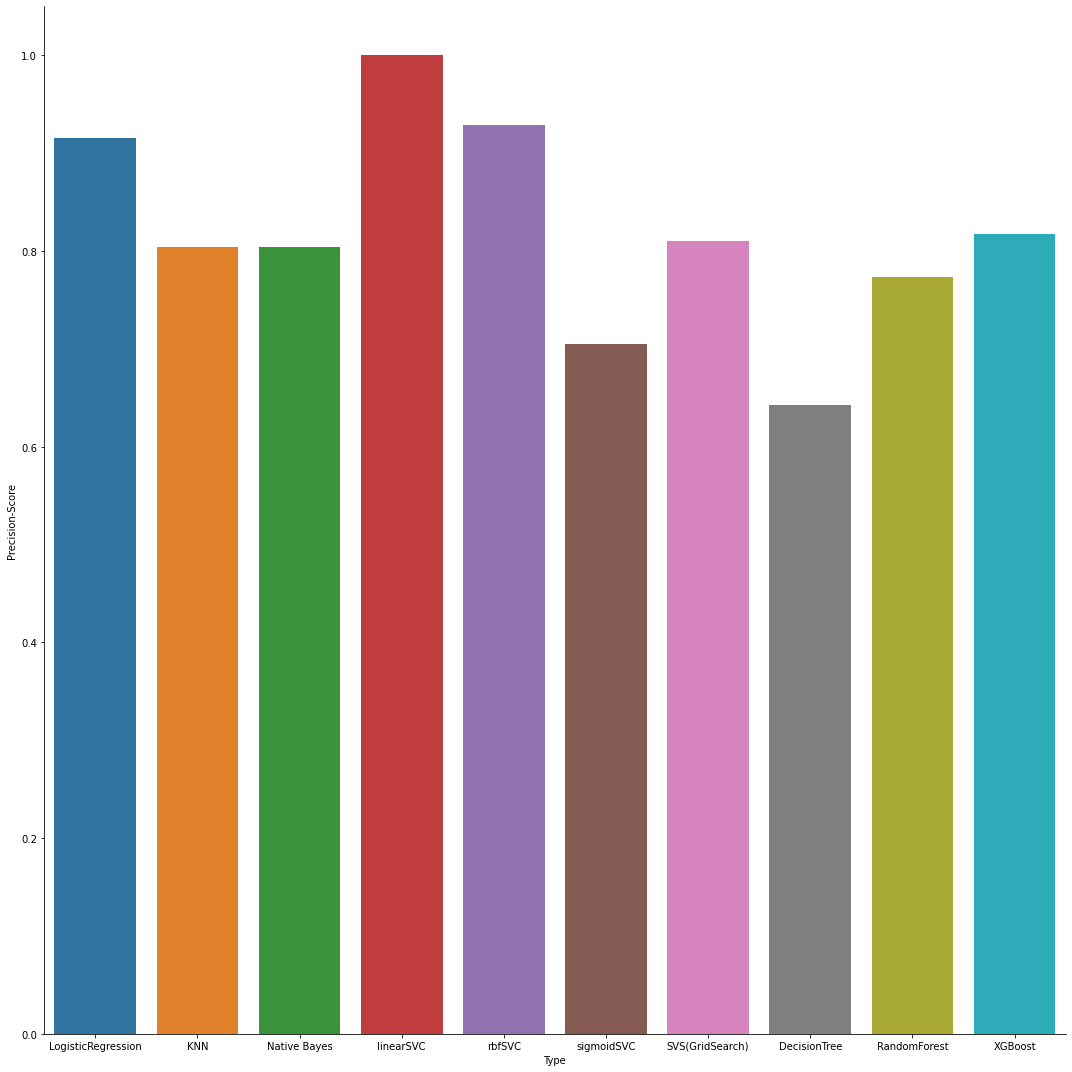

In [200]:
sns.catplot(data=score_train, x="Type", y="Precision-Score",kind="bar", height=15)

## Send us the Result (Maktabkhoone)